In [219]:
import numpy as np
from scipy import misc
from skimage.transform import radon, iradon,iradon_sart
import cv2
import matplotlib.pyplot as plt
import sewar
%matplotlib inline

In [276]:
img = cv2.imread("../images/brain.png",0)
img = cv2.resize(img,(480,480))
# img = np.ones((480,480), dtype='uint8')*255
imsize = img.shape

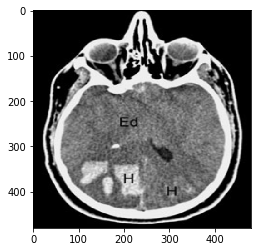

In [277]:
plt.imshow(img, cmap='gray')

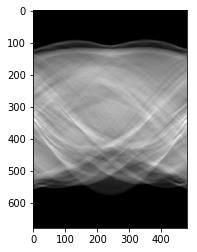

In [278]:
theta0 = np.linspace(0., 180., max(img.shape), endpoint=False)
sinogram0 = radon(img, theta=theta0, circle=False)
plt.imshow(sinogram0, cmap='gray')

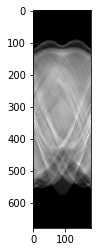

In [279]:
theta1 = np.linspace(0., 180., 180, endpoint=False)
sinogram1 = radon(img, theta=theta1, circle=False)
plt.imshow(sinogram1, cmap='gray')

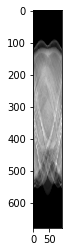

In [280]:
theta2 = np.linspace(0., 180., 90, endpoint=False)
sinogram2 = radon(img, theta=theta2, circle=False)
plt.imshow(sinogram2, cmap='gray')

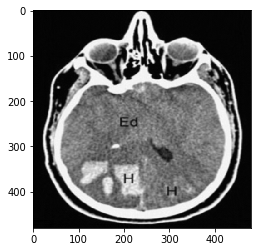

In [281]:
fbp0 = iradon(sinogram0, theta=theta0, circle=False)
plt.imshow(fbp0, cmap = 'gray')

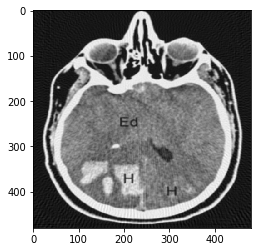

In [282]:
fbp1 = iradon(sinogram1, theta=theta1, circle=False)
plt.imshow(fbp1, cmap = 'gray')

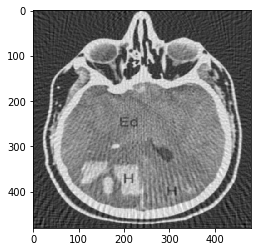

In [283]:
fbp2 = iradon(sinogram2, theta=theta2, circle=False)
plt.imshow(fbp2, cmap = 'gray')

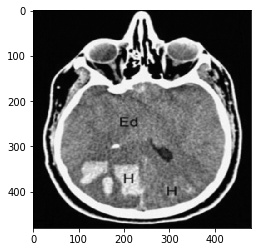

In [284]:
x0 = np.zeros(imsize, dtype='float64')
ATA0 =  iradon(radon(np.ones(imsize,dtype='uint8')*255,theta=theta0,circle=False),theta=theta0,circle=False)
x0+=iradon((sinogram0 - radon(x0,theta=theta0,circle=False)),theta=theta0,circle=False)/ATA0
plt.imshow(x0,cmap='gray')

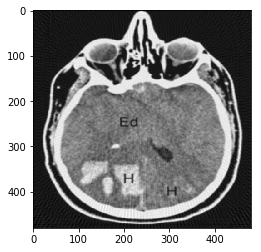

In [289]:
x1 = np.zeros((480,480), dtype='float64')
ATA1 =  iradon(radon(np.ones((480,480),dtype='uint8')*255,theta=theta1,circle=False),theta=theta1,circle=False)
x1+=iradon((sinogram1 - radon(x1,theta=theta1,circle=False)),theta=theta1,circle=False)/ATA1
plt.imshow(x1,cmap='gray')

0
118.233815007
1
118.140137387
2
118.046536386
3
117.953011938
4
117.859563978
5
117.766192442
6
117.672897266
7
117.579678383
8
117.486535731
9
117.393469244
10
117.300478858
11
117.207564508
12
117.11472613
13
117.021963661
14
116.929277035
15
116.836666189
16
116.744131058
17
116.651671579
18
116.559287688
19
116.466979321
20
116.374746413
21
116.282588902
i limit reached


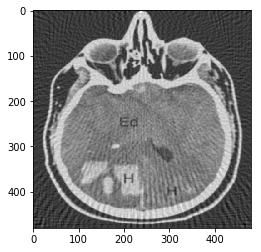

In [290]:
x2 = np.zeros((480,480), dtype='float64')
ATA2 =  iradon(radon(np.ones((480,480),dtype='uint8')*255,theta=theta2,circle=False),theta=theta2,circle=False)
i=0
flag=True
while(flag):
    print(i)
    x2+=0.2*iradon((sinogram2 - radon(x2,theta=theta2,circle=False)),theta=theta2,circle=False)/ATA2
    mse=np.sqrt(np.mean((x2-img)**2))
    print(mse)
    if mse<9:
        print('mse limit reached')
        flag=False
    if i>20:
        print('i limit reached')
        flag=False
    i+=1
plt.imshow(x2,cmap='gray')

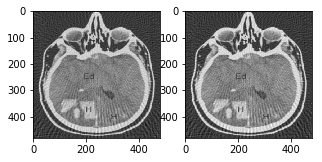

In [310]:
# plt.rc("font", size=10)
plt.rcParams["figure.figsize"] = [5, 10]
plt.subplot(121)
plt.imshow(x2,cmap='gray')
plt.subplot(122)
plt.imshow(fbp2,cmap='gray')

In [311]:
error1 = fbp2 - img
print('FBP rms reconstruction error: %.3g' % np.sqrt(np.mean(error1**2)))

FBP rms reconstruction error: 14.9


In [312]:
error1 = x2 - img
print('FBP rms reconstruction error: %.3g' % np.sqrt(np.mean(error1**2)))

FBP rms reconstruction error: 116


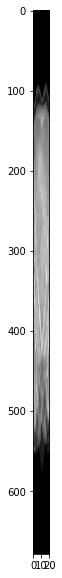

In [313]:
theta3 = np.linspace(0., 180., 20, endpoint=False)
sinogram3 = radon(img, theta=theta3, circle=False)
plt.imshow(sinogram3, cmap='gray')

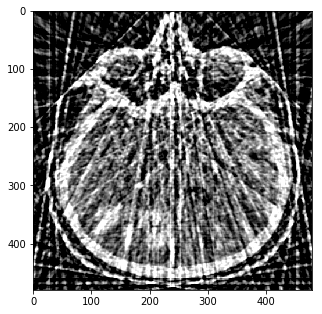

In [314]:
fbp3 = iradon(sinogram3, theta=theta3, circle=False)
np.clip(fbp3,0,255,out=fbp3)
plt.imshow(fbp3, cmap = 'gray')

In [315]:
error3 = fbp3 - img
print('FBP rms reconstruction error: %.3g' % np.sqrt(np.mean(error3**2)))

FBP rms reconstruction error: 57.1


0
1e+100
10
109.39225915
20
101.468681246
30
94.3646393901
40
87.9627526478
50
82.1804886641
60
76.9542643518
70
72.2320243486
80
67.969354084
90
64.1272468806
100
60.6707207486


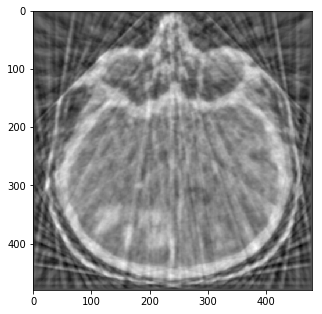

In [316]:
x3 = np.zeros((480,480), dtype='float64')
ATA3 =  iradon(radon(np.ones((480,480),dtype='uint8')*255,theta=theta3,circle=False),theta=theta3,circle=False)
i=0
flag=True
error = 1e100
while(flag):
    if(i%10==0):
        print(i)
        print(error)
    temp = x3
    temp+=2*iradon((sinogram3 - radon(temp,theta=theta3,circle=False)),theta=theta3,circle=False)/ATA3
    mse=np.sqrt(np.mean((temp-img)**2))
    if(i>100):
        flag = False
    else:
        x3 = temp
        error = mse
    i+=1
plt.imshow(x3,cmap='gray')

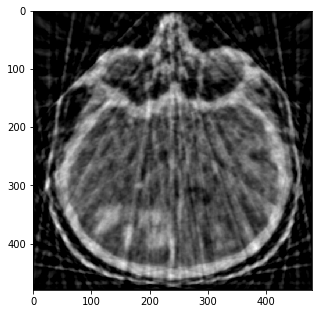

In [317]:
np.clip(x3,0,255,out=x3)
plt.imshow(x3, cmap='gray')

In [318]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
x3 = cv2.filter2D(x3, -1, kernel)

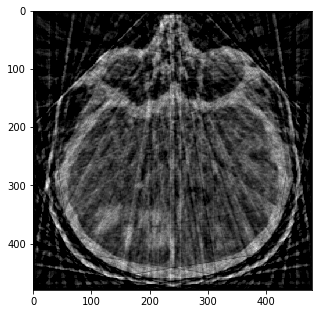

In [319]:
np.clip(x3,0,255,out=x3)
plt.imshow(x3, cmap='gray')

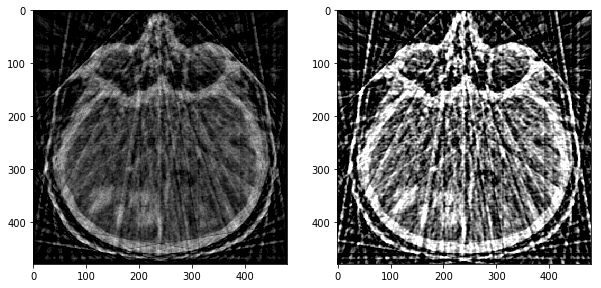

In [328]:
plt.rc("font", size=10)
plt.rcParams["figure.figsize"] = [10, 20]
plt.subplot(121)
plt.imshow(x3,cmap='gray')
plt.subplot(122)
plt.imshow(fbp3,cmap='gray')

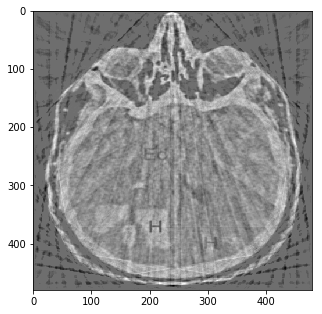

In [320]:
plt.imshow(img-x3,cmap='gray')

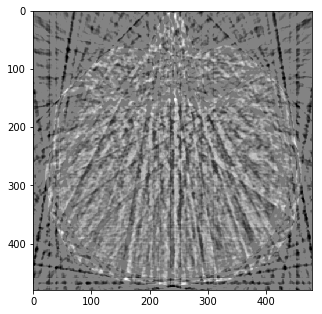

In [321]:
plt.imshow(img-fbp3,cmap='gray')

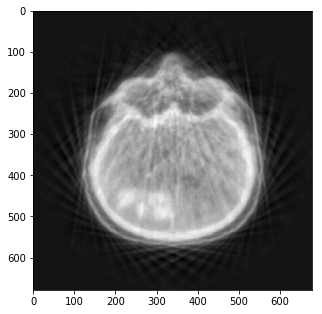

In [322]:
reconstruction_sart = iradon_sart(sinogram3, theta=theta3)
plt.imshow(reconstruction_sart, cmap='gray')

In [323]:
def compute_quality_metrics(original_image, estimated_image):
    print('RMSE: %.4g' % sewar.full_ref.rmse(original_image,estimated_image))
    print('SSIM: %.4g' % sewar.full_ref.ssim(original_image,estimated_image)[0])
    print('PSNR: %.4g' % sewar.full_ref.psnr(original_image,estimated_image))
    print('UQI: %.4g' % sewar.full_ref.uqi(original_image,estimated_image))
    print('SCC: %.4g' % sewar.full_ref.scc(original_image,estimated_image))

In [324]:
compute_quality_metrics(img, x3)

RMSE: 59.25
SSIM: 0.3304
PSNR: 12.68
UQI: 0.4779
SCC: 0.1533


/home/darshan3/anaconda3/lib/python3.6/site-packages/sewar/utils.py:16: UserWarning: Supplied images have different dtypes uint8 and float64
  warnings.warn(msg)


In [325]:
compute_quality_metrics(img, fbp3)

RMSE: 57.15
SSIM: 0.295
PSNR: 12.99
UQI: 0.5833
SCC: 0.1719


/home/darshan3/anaconda3/lib/python3.6/site-packages/sewar/utils.py:16: UserWarning: Supplied images have different dtypes uint8 and float64
  warnings.warn(msg)


In [326]:
compute_quality_metrics(img, fbp2)

/home/darshan3/anaconda3/lib/python3.6/site-packages/sewar/utils.py:16: UserWarning: Supplied images have different dtypes uint8 and float64
  warnings.warn(msg)


RMSE: 14.9
SSIM: 0.6189
PSNR: 24.66
UQI: 0.6931
SCC: 0.3754


In [327]:
compute_quality_metrics(img, x2)

RMSE: 116.3


/home/darshan3/anaconda3/lib/python3.6/site-packages/sewar/utils.py:16: UserWarning: Supplied images have different dtypes uint8 and float64
  warnings.warn(msg)


SSIM: 0.2581
PSNR: 6.821
UQI: 0.002327
SCC: 0.3748
